# 1-Data Preprocessing

In [3]:
import pandas as pd
import numpy  as np 
import seaborn  as sns
import  matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Ss = StandardScaler()

In [4]:
df = pd.read_csv(r"C:\Users\body_\Online Retail.csv")

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.dropna(subset=["Description"] , inplace=True)

In [8]:
df.drop(columns= ["CustomerID"], inplace= True)

In [9]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

np.int64(0)

In [14]:
df["Customer_Lifetime_Value"] = df["Quantity"] * df["UnitPrice"]

In [15]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["hour_of_day"] = df["InvoiceDate"].dt.hour
df["day_of_week"] = df["InvoiceDate"].dt.day_name()
df["month"] = df["InvoiceDate"].dt.month

In [16]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Customer_Lifetime_Value,hour_of_day,day_of_week,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,8,Wednesday,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,8,Wednesday,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,8,Wednesday,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,8,Wednesday,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,8,Wednesday,12
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,10.20,12,Friday,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,12.60,12,Friday,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,16.60,12,Friday,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,16.60,12,Friday,12


<Axes: >

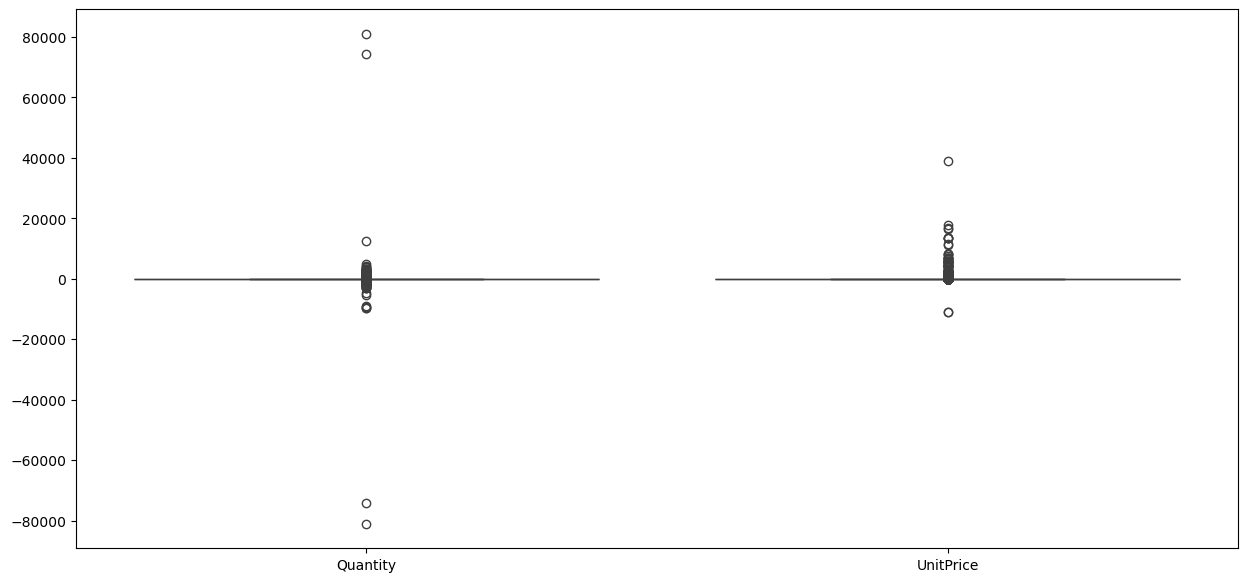

In [15]:
plt.figure(figsize= (15,7))
sns.boxplot(df)

In [36]:
df["Quantity_log"] = np.log1p(df["Quantity"])
df["Quantity_sqrt"] = np.log1p(df["Quantity"])

c:\Users\body_\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\body_\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: ylabel='Quantity_log'>

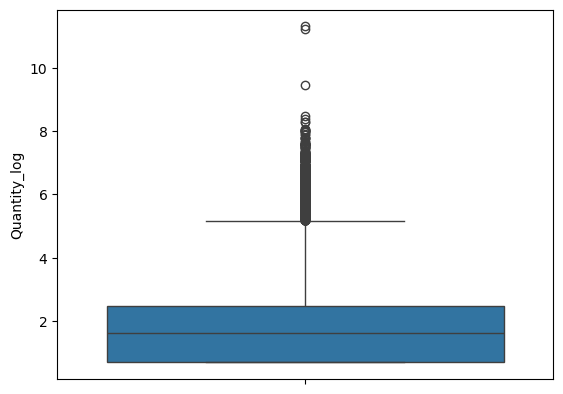

In [37]:
sns.boxplot(df["Quantity_log"])

<Axes: ylabel='Quantity_sqrt'>

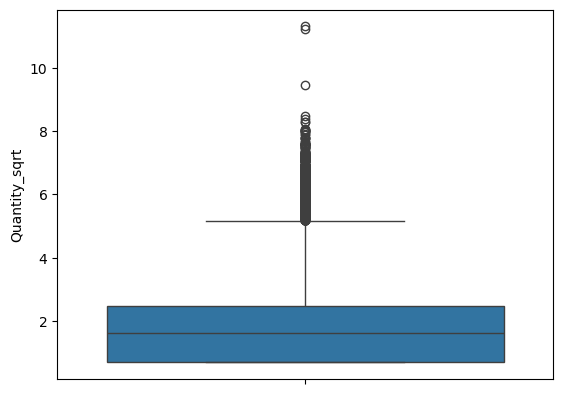

In [38]:
sns.boxplot(df["Quantity_sqrt"])

In [40]:
df[["Quantity_log","Quantity_sqrt"]].describe()

,Quantity_log,Quantity_sqrt
count,5.295520e+05,5.295520e+05
mean,-inf,-inf
std,NaN,NaN
min,-inf,-inf
25%,6.931472e-01,6.931472e-01
50%,1.386294e+00,1.386294e+00
75%,2.397895e+00,2.397895e+00
max,1.130216e+01,1.130216e+01


In [7]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [50]:
df["UnitPrice_log"] = np.log1p(df["UnitPrice"])
df["UnitPrice_sqrt"] = np.sqrt(df["UnitPrice"])

c:\Users\body_\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\body_\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: ylabel='UnitPrice_log'>

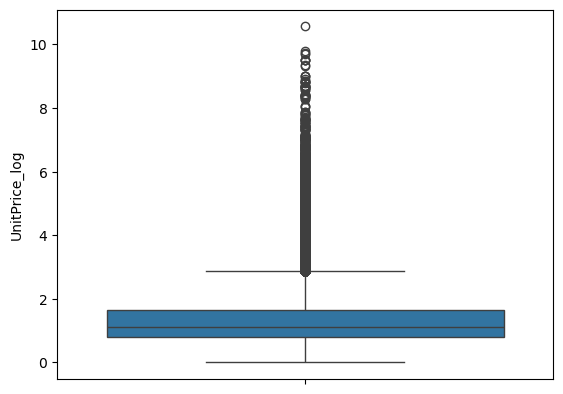

In [51]:
sns.boxplot(df["UnitPrice_log"])

<Axes: ylabel='UnitPrice_sqrt'>

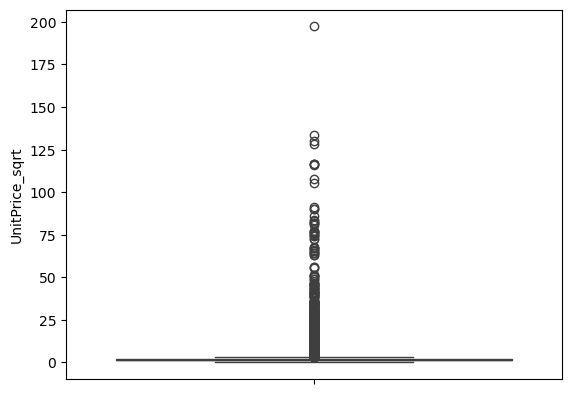

In [52]:
sns.boxplot(df["UnitPrice_sqrt"])

In [56]:
df.drop(columns= ["UnitPrice", "UnitPrice_sqrt"], inplace=True)
df

,InvoiceNo,StockCode,Description,InvoiceDate,Country,Quantity_log,UnitPrice_log
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12/1/2010 8:26,United Kingdom,1.945910,1.266948
1,536365,71053,WHITE METAL LANTERN,12/1/2010 8:26,United Kingdom,1.945910,1.479329
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,12/1/2010 8:26,United Kingdom,2.197225,1.321756
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,12/1/2010 8:26,United Kingdom,1.945910,1.479329
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,12/1/2010 8:26,United Kingdom,1.945910,1.479329
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12/9/2011 12:50,France,2.564949,0.615186
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,12/9/2011 12:50,France,1.945910,1.131402
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,12/9/2011 12:50,France,1.609438,1.638997
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,12/9/2011 12:50,France,1.609438,1.638997
